# CycleGAN - Hugo Peralta Muñoz

Este enfoque de traducción de imagen a imagen permite convertir imágenes de un dominio a otro sin necesidad de contar con pares de ejemplos equivalentes para el entrenamiento. Para lograrlo, se utiliza una red generativa adversarial (*GAN*) que aprende a transformar imágenes de un conjunto inicial de manera que sean indistinguibles de las del conjunto objetivo. Sin embargo, como esta conversión no tiene una única solución, se introduce un segundo modelo que intenta revertir la transformación, asegurando que al convertir una imagen y luego deshacer el cambio, se obtenga una imagen lo más parecida posible a la original.

Se ha aplicado con éxito en tareas como la transferencia de estilos artísticos, el cambio de estaciones en paisajes, la transformación de objetos y la mejora de fotografías, demostrando su superioridad frente a otros métodos anteriores.

Puedes ver como introducción el siguiente vídeo explicativo sobre el paper en el que se basa: [Youtube Video](https://www.youtube.com/watch?v=D4C1dB9UheQ)

## Contexto histórico

El desarrollo de **CycleGAN** se enmarca en la evolución de las redes generativas adversariales (GANs), una de las innovaciones más importantes en el campo del aprendizaje profundo y la visión por computadora. Las *GANs* fueron introducidas en $2014$ por *Ian Goodfellow* y su equipo, proponiendo un sistema en el que dos redes neuronales (un generador y un discriminador) compiten entre sí para generar imágenes cada vez más realistas. A partir de este avance, surgieron numerosas variaciones de *GANs* con el objetivo de mejorar su estabilidad, calidad de generación y capacidad de control sobre la transformación de imágenes.

Antes de *CycleGAN*, los métodos de traducción de imagen a imagen, como *pix2pix*, requerían conjuntos de imágenes de entrada y salida alineadas para aprender la transformación deseada. Sin embargo, en muchos casos, este tipo de datos no está disponible. Para abordar esta limitación, en $2017$, *Jun-Yan Zhu*, *Taesung Park*, *Phillip Isola* y *Alexei A. Efros* propusieron **CycleGAN**, un modelo capaz de aprender la conversión entre estilos de imágenes sin necesidad de pares de entrenamiento. Esto fue posible gracias a la introducción de la consistencia de ciclo, una técnica que obliga al modelo a poder transformar una imagen a otro estilo y luego revertir la transformación, asegurando que el resultado sea lo más cercano posible a la imagen original.

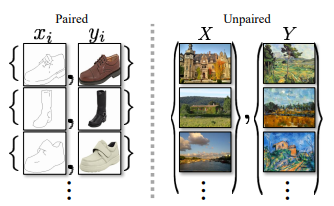

## Arquitectura

La arquitectura de CycleGAN es diferente de otras GAN en el sentido de que contiene dos funciones de mapeo ( $G$ y $F$ ) que actúan como generadores y sus correspondientes discriminadores ($Dx$ y $Dy$): Las funciones de mapeo del generador son las siguientes:

$G: X \rightarrow Y$ 

$F: Y \rightarrow X$

donde $X$ es la distribución de la imagen de entrada e $Y$ es la distribución de salida deseada (como el estilo de Van Gogh). Los discriminadores son: 

$Dx$: distinguir $G(X)$ (salida generada) de $Y$ (salida real)

$Dy$: distinguir $F(Y)$ (salida inversa generada) de $X$ (distribución de entrada)

Para regularizar aún más las asignaciones, los autores utilizaron dos funciones de pérdida más, además de la pérdida adversarial: la pérdida de consistencia del ciclo hacia adelante y la pérdida de consistencia del ciclo hacia atrás.

La pérdida de consistencia del ciclo hacia adelante y la pérdida de consistencia del ciclo hacia atrás nace de la necesidad de regularizar el modelo, ya que la construcción normal de una *GAN* como se conocía presentaba una problemática, tal y como cita el paper original de la *CycleGAN*:

> El entrenamiento adversarial puede, en teoría, aprender mapeos $G$ y $F$ que produzcan salidas distribuidas de manera idéntica a los dominios objetivo $Y$ y $X$, respectivamente. 
> 
> Sin embargo, si la capacidad de la red neuronal es lo suficientemente grande, esta puede asignar el mismo conjunto de imágenes de entrada a cualquier permutación aleatoria de imágenes en el dominio objetivo, donde cualquiera de los mapeos aprendidos puede inducir una distribución de salida que coincida con la distribución objetivo.  
>
> Por lo tanto, una pérdida adversarial por sí sola no puede garantizar que la función aprendida pueda mapear una entrada individual $x_i$ a una salida deseada $y_i$.

La pérdida de consistencia del ciclo hacia adelante refina el ciclo: 

$x \rightarrow G(x) \rightarrow F(G(x)) \approx x$

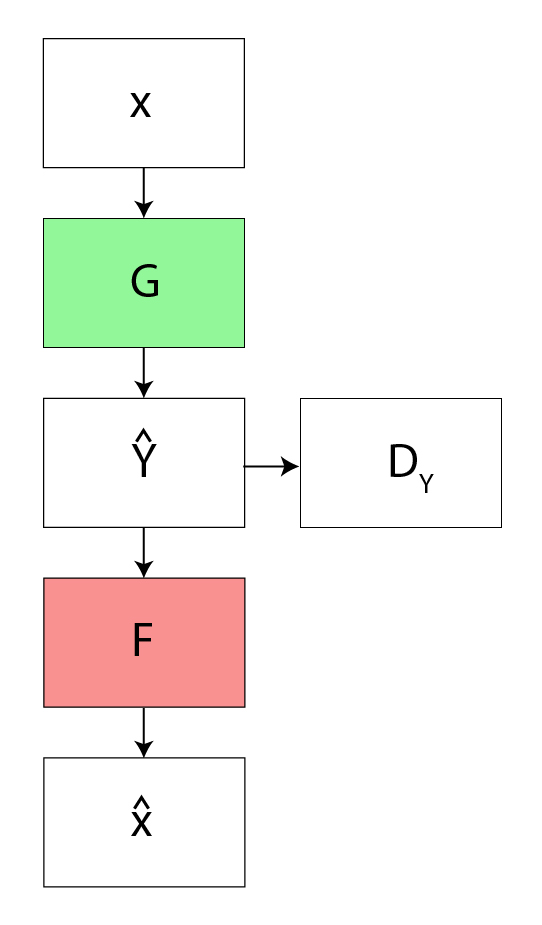

La pérdida de consistencia del ciclo hacia atrás refina el ciclo:

$y \rightarrow F(y) \rightarrow G(F(y)) \approx y$

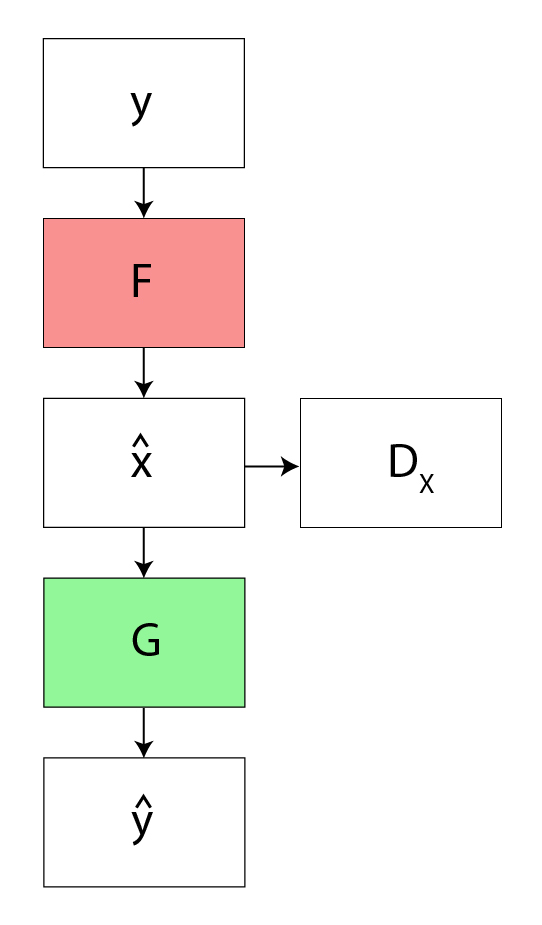

Ejemplo de resultado: 

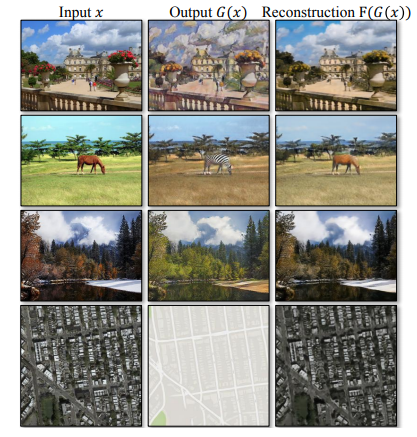

## Características

- **Traducción de imágenes sin datos emparejados**: *CycleGAN* es capaz de realizar traducción de imágenes entre dominios sin la necesidad de datos emparejados. Esto significa que, a diferencia de otros enfoques como Pix2Pix, donde se requiere un conjunto de imágenes de entrada y salida correspondientes, CycleGAN puede aprender a mapear imágenes de un estilo ($X$) a otro ($Y$) usando solo imágenes de cada dominio por separado. Esta capacidad es especialmente útil en situaciones donde es difícil o costoso obtener datos emparejados, como en el caso de la transferencia de estilo artístico o la conversión de imágenes entre estaciones del año.

- **Consistencia de ciclo**: Es un procedimiento único de este tipo de *GANs*. Este ciclo de transformación y reversión impone una restricción adicional que ayuda a mantener la coherencia y estructura de la imagen, previniendo que el modelo haga transformaciones irreversibles o arbitrarias que podrían degradar la calidad visual de la imagen.

- **No necesita etiquetas**: Una ventaja significativa de *CycleGAN* es que no requiere que las imágenes estén etiquetadas o segmentadas previamente. A diferencia de otros métodos de aprendizaje supervisado que dependen de la presencia de etiquetas explícitas para entrenar el modelo, *CycleGAN* puede aprender a transformar imágenes de un dominio a otro sin ninguna información adicional sobre el contenido de las imágenes. Esto lo hace adecuado para aplicaciones donde obtener anotaciones o segmentaciones detalladas es impráctico o costoso, como en la mejora de imágenes médicas o en la conversión de estilos artísticos.

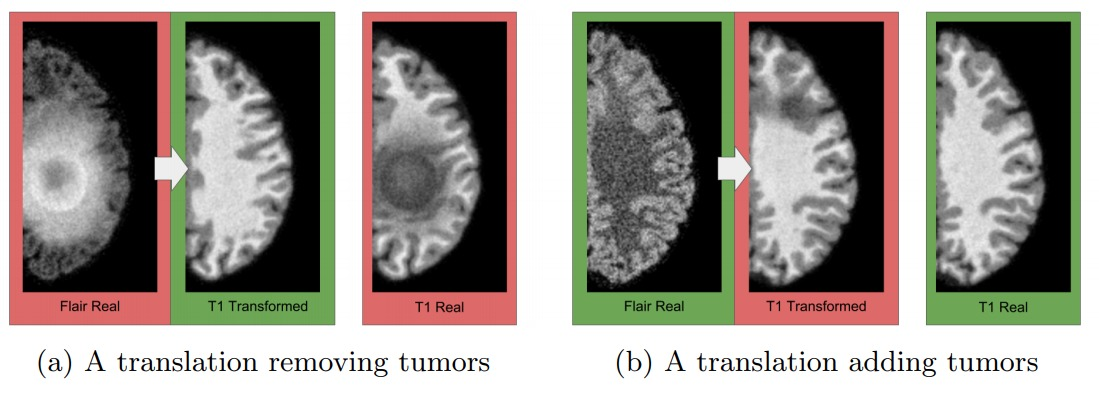

## Casos de uso

Hay varios casos donde se ha aplicado esta técnica, varios de ellos aparecen en su web oficial: [Web Github.io](https://junyanz.github.io/CycleGAN/)

* *Jack Clark* usó el código del propio paper de *Jun-Yan Zhu* y su equipo para crear vistas de satélites de ciudades antiguas:

[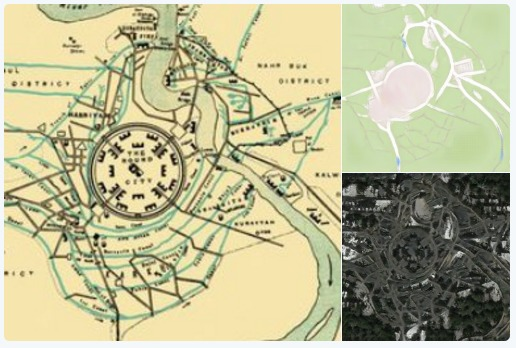](https://jack-clark.net/2017/06/05/import-ai-issue-45/)

* *Mario Klingemann* entrenó el modelo para que fuese capaz de convertir fotos antiguas en blanco y negro a fotos a color:

[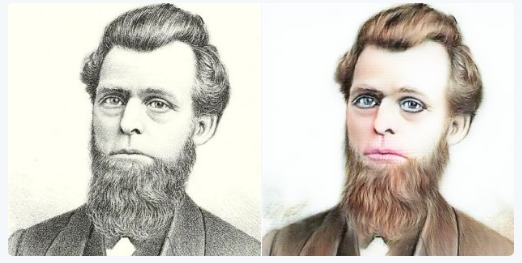](https://x.com/quasimondo/status/867023499214413830)

* *David Fouhey* realizó un trabajo increíble para cambiar el estilo artístico de Monet en el estilo de Thomas Kinkade:

[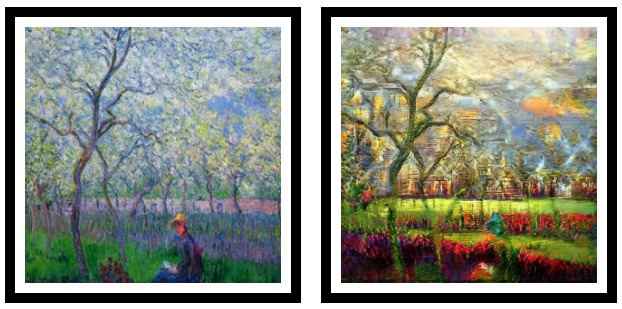](https://web.eecs.umich.edu/~fouhey//fun/monet/index.html)